In [1]:
import pso
import dataset
import network
import numpy as np

In [2]:
# One element for every weight + 2 at end for activation functions
num_values = (
    dataset.num_features * 4 # Input layer weights
    + 4 ** 2                 # Hidden layer weights
    + 4                      # Output layer weights
    + 2                      # Activation functions
    + 2 * 4 + 1              # Bias weights for all layers
)

min_values = np.ones(num_values) * -1
max_values = np.ones(num_values) * 1

# 4 possible activation functions (0-1, 1-2, 2-3, 3-4)
min_values[-2:] = 0
max_values[-2:] = 3.99999


def fitness(coords: np.ndarray):
    net = network.network.from_list(coords, dataset.num_features)
    y_pred = net.forward_propagate(dataset.x)

    # Using loss for fitness since accuracy involved rounding which
    # means improvement will be limited to just getting probabilities
    # on the right side of 0.5
    return net.get_loss(dataset.y, y_pred)

## ANN Search

In [3]:
swarm = pso.swarm(min_values, max_values, fitness_func=fitness)
found = swarm.search(iterations=50)
model = network.network.from_list(found, dataset.num_features)

In [4]:
y_probs = model.forward_propagate(dataset.x)
y_preds = np.around(y_probs)

print(all(y_preds == 1))
print(np.mean(y_preds == dataset.y))

True
0.5555555555555556


## Tracking Particles

The following gets a list of all particle positions for each iteration of the search. Since these are multidimensional, we can only plot 1-2 diumensions at a time.

In [5]:
iterations = 500
swarm = pso.swarm(min_values, max_values, fitness_func=fitness)
swarm.set_hyperparameters(beta=0.01, gamma=0.01)
positions = swarm.track_search(iterations=iterations)

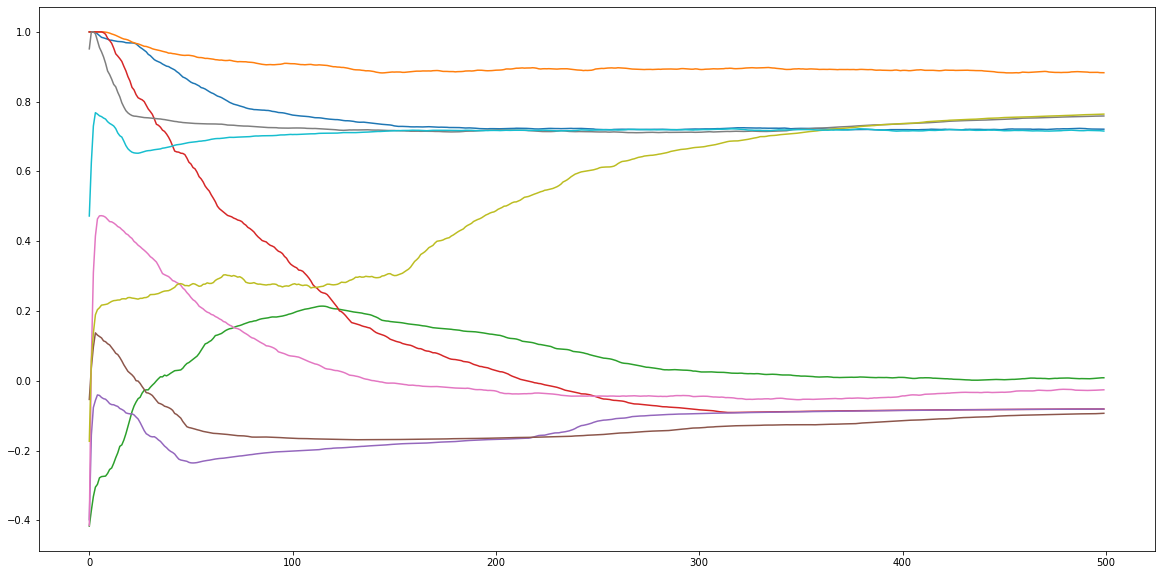

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

timesteps = list(range(iterations))

for particle in positions:
    plt.plot(timesteps, particle[0])

plt.show()

# Simple function application

This just demonsrates that the PSO search behaves as expected (finds the minimum) on the more simple sphere function.

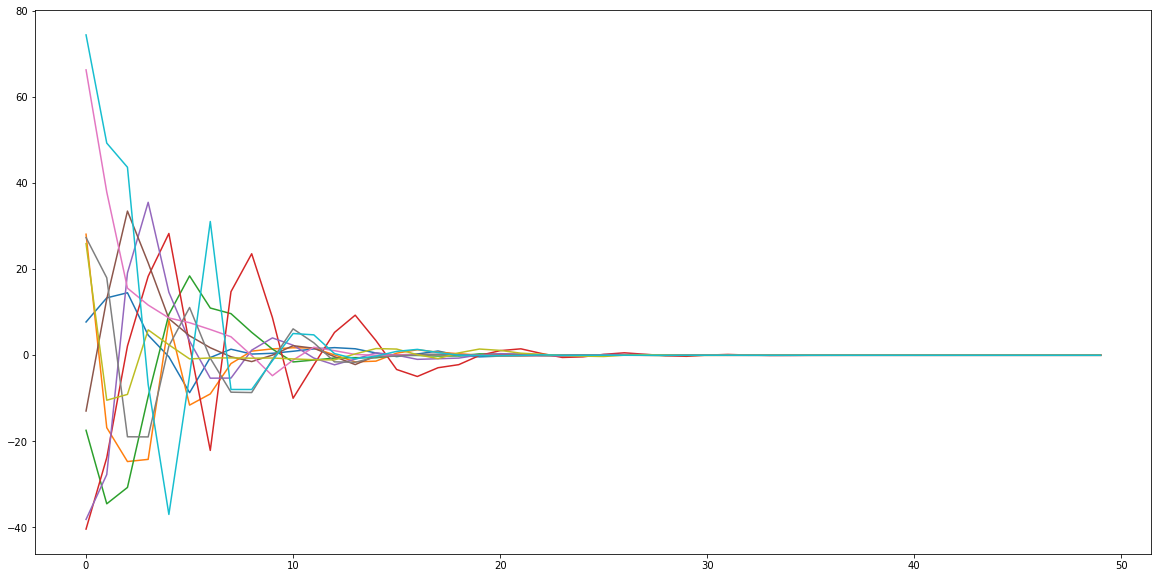

In [7]:
# use default sphere fitness function
swarm = pso.swarm(np.ones(2) * -100, np.ones(2) * 100)
positions = swarm.track_search(iterations=50)

fig = plt.figure(figsize=(20,10))

timesteps = list(range(50))

for particle in positions:
    plt.plot(timesteps, particle[1])

plt.show()